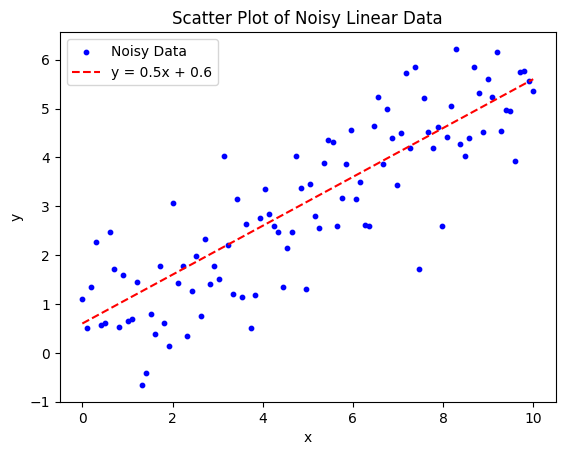

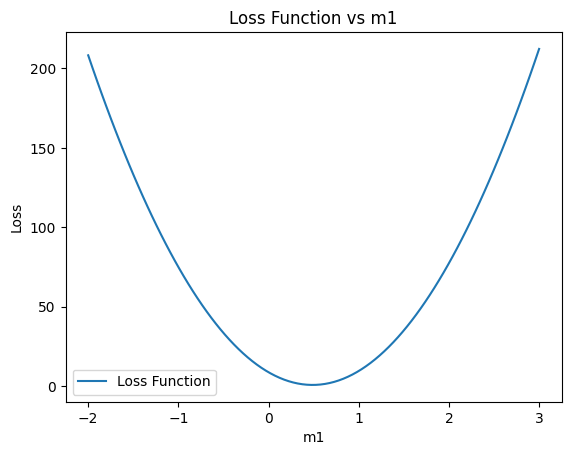

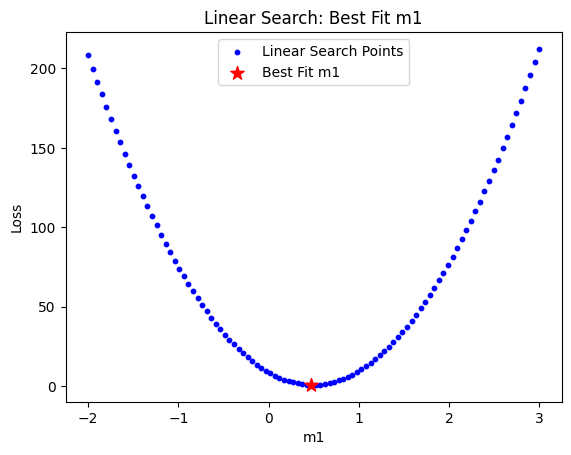

Linear Search: Best fit m1 = 0.4747474747474749, Loss = 0.828368640368441
Gradient Descent: Best m1 = 0.4880016001703345, Loss = 0.8224833379603175
Recursive Global Minima: Best m1 = 0.4880016001703345, Loss = 0.8224833379603175
Gradient Descent is better as it achieved a lower loss.


In [6]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt

#Defined a linear regression class for implementing oops concepts
class LinearRegression:
    def __init__(self, x, y, m1_true, m2_true):
        """
        Initialize the LinearRegression class with data and true parameters.

        Args:
            x (np.array): Independent variable.
            y (np.array): Dependent variable with noise.
            m1_true (float): True slope.
            m2_true (float): True intercept.
        """
        self.x = x
        self.y = y
        self.m1_true = m1_true
        self.m2_true = m2_true

    def plot_data(self):
        """Plot the noisy data and the true line."""
        plt.scatter(self.x, self.y, color='blue', s=10, label="Noisy Data")  # Scatter plot of the noisy data points
        plt.plot(self.x, self.m1_true * self.x + self.m2_true, color='red', linestyle='dashed', label="y = 0.5x + 0.6")  # Plot the true line
        plt.xlabel("x")  # Label for the x-axis
        plt.ylabel("y")  # Label for the y-axis
        plt.title("Scatter Plot of Noisy Linear Data")  # Title of the plot
        plt.legend()
        plt.show()

    def loss_function(self, m1, m2):
        """
        Calculate the Mean Squared Error (MSE) loss.

        Args:
            m1 (float): Slope.
            m2 (float): Intercept.

        Returns:
            float: Mean Squared Error.
        """
        y_pred = m1 * self.x + m2  # Predicted y values based on the current m1 and m2
        return np.mean((y_pred - self.y) ** 2)  # Calculate the mean squared error

    def plot_loss_function(self, m1_values):
        """
        Plot the loss function for m1 by keeping m2 fixed at its true value.

        Args:
            m1_values (np.array): Array of m1 values to test.
        """
        loss_values = [self.loss_function(m1, self.m2_true) for m1 in m1_values]  # Calculate loss for each m1 value
        plt.plot(m1_values, loss_values, label='Loss Function')  # Plot m1 vs loss
        plt.xlabel('m1')  # Label for the x-axis
        plt.ylabel('Loss')  # Label for the y-axis
        plt.title('Loss Function vs m1')  # Title of the plot
        plt.legend()
        plt.show()

    def linear_search(self, m1_values):
        """
        Perform a linear search to find the best-fit m1.

        Args:
            m1_values (np.array): Array of m1 values to test.

        Returns:
            float: Best-fit m1 value.
            float: Minimum loss.
        """
        best_fit_m1 = None  # Variable to store the best-fit m1 value
        minimum_loss = float('inf')  # Variable to store the minimum loss, initialized to infinity

        # Iterate through all m1 values to find the one that minimizes the loss function
        for m1 in m1_values:
            current_loss = self.loss_function(m1, self.m2_true)  # Calculate the loss for the current m1 value
            if current_loss < minimum_loss:  # Check if the current loss is less than the minimum loss found so far
                minimum_loss = current_loss  # Update the minimum loss
                best_fit_m1 = m1  # Update the best-fit m1 value

        # Plot the results of the linear search
        loss_values = [self.loss_function(m1, self.m2_true) for m1 in m1_values]
        plt.scatter(m1_values, loss_values, color='blue', s=10, label='Linear Search Points')  # Plot all m1 values and their corresponding losses
        plt.scatter(best_fit_m1, minimum_loss, color='red', s=100, marker='*', label='Best Fit m1')  # Highlight the best-fit m1 value
        plt.xlabel('m1')  # Label for the x-axis
        plt.ylabel('Loss')  # Label for the y-axis
        plt.title('Linear Search: Best Fit m1')  # Title of the plot
        plt.legend()
        plt.show()

        return best_fit_m1, minimum_loss

    def gradient_descent(self, m1_start, learning_rate, epochs):
        """
        Perform gradient descent to optimize m1.

        Args:
            m1_start (float): Initial value of m1.
            learning_rate (float): Learning rate.
            epochs (int): Number of iterations.

        Returns:
            float: Optimized m1 value.
        """
        m1 = m1_start  # Start with the initial value of m1

        # Loop through the specified number of epochs (iterations)
        for _ in range(epochs):
            # Compute the gradient of the loss function with respect to m1
            # This is the derivative of the mean squared error loss(L2 error - loss function)
            gradient = np.mean(2 * (m1 * self.x + self.m2_true - self.y) * self.x)

            # Update m1 by moving in the direction opposite to the gradient
            # The learning rate controls how big each step is
            m1 -= learning_rate * gradient

        return m1  # Return the optimized value of m1

    def recursive_global_minima(self, learning_rate, epochs, num_runs=10):
        """
        Recursively find the global minima by trying multiple starting points.

        Args:
            learning_rate (float): Learning rate.
            epochs (int): Number of iterations.
            num_runs (int): Number of random starting points.

        Returns:
            float: Best m1 value.
            float: Minimum loss.
        """
        best_m1_overall = None  # Will store the best m1 value across all runs
        min_loss_overall = float('inf')  # Start with a very high loss value (infinity) to ensure any real loss is smaller

        # Try 10 different random starting points for m1 to avoid getting stuck in a local minimum
        for _ in range(num_runs):
            # Generate a random starting value for m1 between -10 and 10
            m1_start = np.random.uniform(-10, 10)

            # Run gradient descent to find the best m1 for this starting point
            best_m1 = self.gradient_descent(m1_start, learning_rate, epochs)

            # Calculate the loss for the current best_m1
            loss = self.loss_function(best_m1, self.m2_true)

            # Check if this run gave a better loss than the previous best
            if loss < min_loss_overall:
                min_loss_overall = loss  # Update the minimum loss
                best_m1_overall = best_m1  # Update the best m1

        return best_m1_overall, min_loss_overall


# Step 1: Generate Noisy Data
np.random.seed(42)  # Ensures that the random numbers generated are the same every time the code is run
x = np.linspace(0, 10, 100)  # Create 100 evenly spaced points between 0 and 10
m1_true, m2_true = 0.5, 0.6  # True values for the slope and intercept of the line
y = m1_true * x + m2_true + np.random.normal(0, 1, 100)  # Line equation for the function to calculate the dependent variable y with added Gaussian noise to mimic real-world scenarios

# Step 2: Initialize LinearRegression Object
lr = LinearRegression(x, y, m1_true, m2_true)

# Step 3: Plot Data
lr.plot_data()

# Step 4: Plot Loss Function
m1_values = np.linspace(-2, 3, 100)  # Generate 100 values of m1 between -2 and 3 for testing purposes to find the best-fit m value where loss is minimum
lr.plot_loss_function(m1_values)

# Step 5: Linear Search
best_fit_m1, minimum_loss = lr.linear_search(m1_values)
print(f"Linear Search: Best fit m1 = {best_fit_m1}, Loss = {minimum_loss}")

# Step 6: Gradient Descent
best_m1_gd = lr.gradient_descent(m1_start=0.1, learning_rate=0.01, epochs=1000)
best_loss_gd = lr.loss_function(best_m1_gd, m2_true)
print(f"Gradient Descent: Best m1 = {best_m1_gd}, Loss = {best_loss_gd}")

# Step 7: Recursive Global Minima
best_m1_overall, min_loss_overall = lr.recursive_global_minima(learning_rate=0.01, epochs=1000)
print(f"Recursive Global Minima: Best m1 = {best_m1_overall}, Loss = {min_loss_overall}")
# Step 8: GD Vs Linear Search
if best_loss_gd < min_loss_ls:
    print("Gradient Descent is better as it achieved a lower loss.")
else:
    print("Linear Search performed better in this case.")